# Outlier Detection

W wielu praktycznych przypadkach stajemy przed problemem znajdowanie danych odstających (Outlier Detection). Czyli takich , które w pewnym sensie nie pasują do naszych danych. 

Należy dokonać dwóch ważnych rozróżnień:

* Outlier Detection
 Dane treningowe zawierają wartości odstające, które są zdefiniowane jako obserwacje dalekie od innych. 

* Novelty Detection:
 Dane nie zawierają elementów odstających natomiast chcemy znaleźć elementy, które reprezentują nowe własności.


Wykrywanie elementów odstających (Outlier Detection) są wykorzystywane do **wykrywania anomalii**, gdzie interesuje nas wykrywanie nieprawidłowych lub nietypowych obserwacji.

http://sdsawtelle.github.io/blog/output/week9-anomaly-andrew-ng-machine-learning-with-python.html

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [10]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

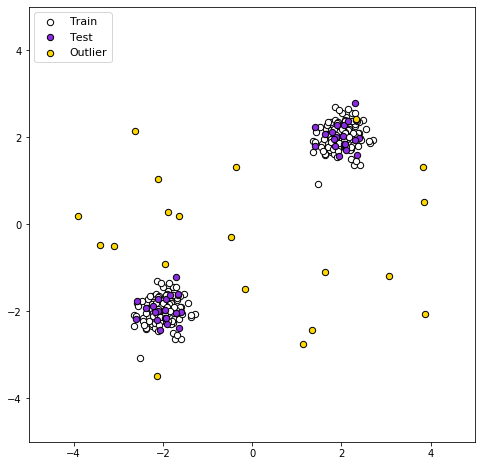

In [11]:
plt.figure(figsize=(8,8))
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["Train", "Test", "Outlier"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

# EllipticEnvelope

## Zad

znajdż elementy odstające za pomocą metody 
```python
from sklearn.covariance import EllipticEnvelope
```

In [12]:
from sklearn.covariance import EllipticEnvelope

elipse = EllipticEnvelope(contamination=0.1).fit(X_train)

### Narysuj funkcję decyzyjną

In [13]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = elipse.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

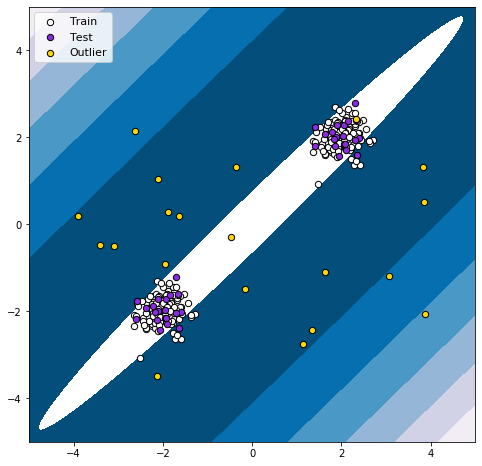

In [14]:
plt.figure(figsize=(8,8))
s = 40
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["Train", "Test", "Outlier"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()



In [15]:
y_pred_train = elipse.predict(X_train)
y_pred_test = elipse.predict(X_test)
y_pred_outliers = elipse.predict(X_outliers)
print(y_pred_train)
print(y_pred_test)
print(y_pred_outliers)

[ 1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1 -1  1  1  1  1]
[ 1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1]


### Narysuj przydział do klas

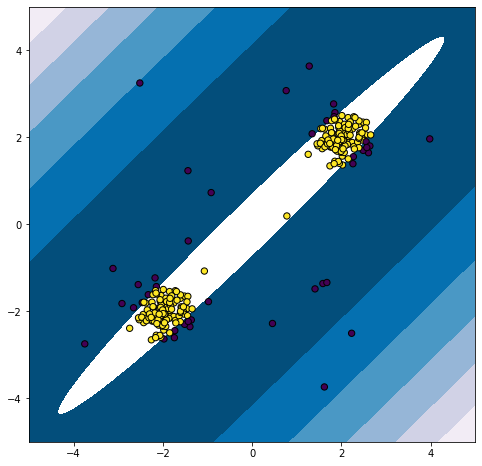

In [8]:
plt.figure(figsize=(8,8))
s = 40
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=s, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, s=s, edgecolors='k')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=y_pred_outliers, s=s,edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

# One-class SVM

## Zad

znajdż elementy odstające za pomocą metody 
```python
from sklearn.svm import OneClassSVM
```

### Narysuj funkcję decyzyjną

# IsolationForest

## Zad

znajdż elementy odstające za pomocą metody 
```python
from sklearn.ensemble import IsolationForest
```

### Narysuj funkcję decyzyjną